In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,NaN,-0.18829,NaN,-0.36156,NaN,-0.93597,NaN,-0.04549,...,NaN,-0.26569,NaN,-0.18401,NaN,-0.11593,NaN,-0.06288,NaN,-0.02447
2,1,0,1.00000,-0.03365,NaN,0.00485,NaN,-0.12062,NaN,0.01198,...,NaN,NaN,NaN,NaN,NaN,-0.17365,0.60436,-0.24180,NaN,NaN
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,NaN,0.06531,NaN,-0.23255,NaN,-0.16399,...,NaN,-0.65158,NaN,-0.53206,NaN,-0.62197,NaN,-0.59573,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	17
float64		column 4	0
float64		column 5	69
float64		column 6	0
float64		column 7	69
float64		column 8	0
float64		column 9	69
float64		column 10	0
float64		column 11	69
float64		column 12	18
float64		column 13	69
float64		column 14	17
float64		column 15	52
float64		column 16	0
float64		column 17	34
float64		column 18	0
float64		column 19	69
float64		column 20	35
float64		column 21	52
float64		column 22	34
float64		column 23	69
float64		column 24	35
float64		column 25	69
float64		column 26	35
float64		column 27	69
float64		column 28	17
float64		column 29	51
float64		column 30	0
float64		column 31	52
float64		column 32	0
float64		column 33	69
float64		column 34	34


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,334.000000,351.000000,282.000000,351.000000,282.000000,351.000000,282.000000,351.000000,...,282.000000,316.000000,282.000000,334.000000,300.000000,351.000000,299.000000,351.000000,282.000000,317.000000
mean,0.891738,0.0,0.628435,0.044372,0.591567,0.115889,0.551936,0.119360,0.491343,0.181345,...,0.408498,-0.069337,0.579744,-0.075816,0.404231,-0.027907,0.377290,-0.003794,0.398275,0.015241
std,0.311155,0.0,0.505321,0.441435,0.520578,0.460810,0.483633,0.520750,0.514531,0.483851,...,0.580020,0.500507,0.485742,0.549398,0.573275,0.507974,0.566242,0.513574,0.497837,0.467985
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.439235,-0.064735,0.391200,-0.024795,0.209105,-0.054840,0.040655,-0.048075,...,0.000000,-0.331920,0.341788,-0.463705,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.147250
50%,1.000000,0.0,0.864865,0.016310,0.802040,0.022800,0.718990,0.014710,0.668025,0.018290,...,0.564405,-0.012975,0.740245,-0.022475,0.531850,0.000000,0.470290,0.000000,0.473140,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.975600,0.445675,0.943380,0.534195,...,0.911137,0.145983,0.999972,0.145928,0.902610,0.154075,0.865375,0.200120,0.841603,0.166670
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

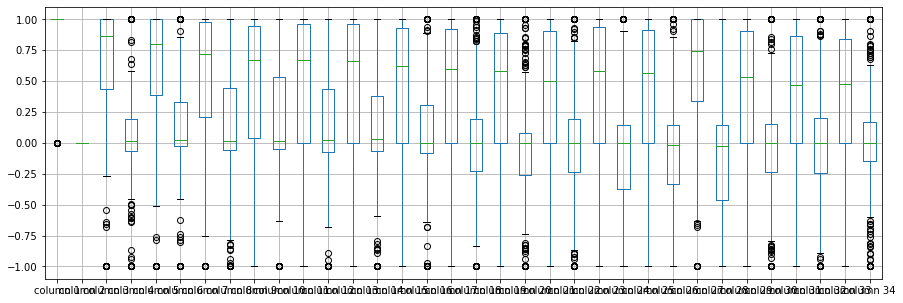

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.628435
column 4     0.044372
column 5     0.591567
column 6     0.115889
column 7     0.551936
column 8     0.119360
column 9     0.491343
column 10    0.181345
column 11    0.458919
column 12    0.135737
column 13    0.415674
column 14    0.098643
column 15    0.363084
column 16    0.071132
column 17    0.378256
column 18   -0.003617
column 19    0.369012
column 20   -0.045800
column 21    0.344761
column 22    0.008698
column 23    0.394951
column 24   -0.070052
column 25    0.408498
column 26   -0.069337
column 27    0.579744
column 28   -0.075816
column 29    0.404231
column 30   -0.027907
column 31    0.377290
column 32   -0.003794
column 33    0.398275
column 34    0.015241
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.318091,-0.006529,0.105062,0.127606,0.203878,0.027079,0.195715,-0.051883,...,0.084520,0.115316,-0.251609,-0.030436,0.130855,-0.121415,0.173644,-0.100914,0.137662,-0.010512
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.318091,NaN,1.000000,0.143769,0.475922,0.043908,0.466821,0.020363,0.477574,0.040137,...,0.356960,-0.119099,0.085788,0.108325,0.376038,0.063857,0.302842,0.006065,0.336431,0.027995
column 4,-0.006529,NaN,0.143769,1.000000,-0.035484,-0.190308,-0.152960,0.255003,-0.295665,0.207697,...,-0.088984,-0.259177,-0.044923,0.010923,0.010890,0.342301,-0.186173,-0.122788,-0.228367,0.031762
column 5,0.105062,NaN,0.475922,-0.035484,1.000000,0.062376,0.592199,-0.023082,0.457791,-0.057832,...,0.313079,-0.055876,0.185686,0.163302,0.330049,0.027107,0.452105,0.030564,0.422739,-0.063495
column 6,0.127606,NaN,0.043908,-0.190308,0.062376,1.000000,-0.012851,0.274747,-0.092875,0.200080,...,-0.155287,0.062881,-0.133355,-0.079099,-0.032252,-0.158090,-0.126457,0.316802,0.049235,0.193384
column 7,0.203878,NaN,0.466821,-0.152960,0.592199,-0.012851,1.000000,-0.190572,0.556580,-0.130354,...,0.363943,0.069706,0.138086,0.156798,0.368880,-0.061734,0.420083,0.038362,0.565636,-0.002929
column 8,0.027079,NaN,0.020363,0.255003,-0.023082,0.274747,-0.190572,1.000000,-0.331114,0.373567,...,-0.182802,-0.117958,-0.236925,0.076515,-0.128257,0.078585,-0.148430,0.152381,-0.180864,0.370535
column 9,0.195715,NaN,0.477574,-0.295665,0.457791,-0.092875,0.556580,-0.331114,1.000000,-0.323860,...,0.392733,0.089791,0.186502,0.092148,0.367132,-0.063810,0.404203,-0.109035,0.471198,-0.098584
column 10,-0.051883,NaN,0.040137,0.207697,-0.057832,0.200080,-0.130354,0.373567,-0.323860,1.000000,...,-0.242592,-0.078164,-0.283883,0.066206,-0.082900,-0.008578,-0.099966,-0.015640,-0.185933,0.159983


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+16,34+16+16,34+16+16+16,34+16+16+16+16,34+16+16+16,34+16+16,34+16,34], vae_layer = False, seed = 160)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 18.08873312813895
Epoch: 1 , loss: 17.93982623872303
Epoch: 2 , loss: 17.904948507036483
Epoch: 3 , loss: 18.00383000146775
Epoch: 4 , loss: 17.848583902631486
Epoch: 5 , loss: 17.959138279869443
Epoch: 6 , loss: 17.89732774098714
Epoch: 7 , loss: 17.868087723141624
Epoch: 8 , loss: 17.747605823335192
Epoch: 9 , loss: 17.699923197428387
Epoch: 10 , loss: 17.805159296308243
Epoch: 11 , loss: 17.71347104935419
Epoch: 12 , loss: 17.492571512858074
Epoch: 13 , loss: 17.556453341529483
Epoch: 14 , loss: 17.31646269843692
Epoch: 15 , loss: 16.891676085335867
Epoch: 16 , loss: 16.33689830416725
Epoch: 17 , loss: 15.899357568650018
Epoch: 18 , loss: 15.794981820242745
Epoch: 19 , loss: 15.81755138578869
Epoch: 20 , loss: 15.593467621576218
Epoch: 21 , loss: 15.436255046299525
Epoch: 22 , loss: 15.70054562886556
Epoch: 23 , loss: 15.533923058282761
Epoch: 24 , loss: 15.32379422869001
Epoch: 25 , loss: 15.600093

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0,0,-0.699979,0.0,-0.638043,0.0,0.396055,0.0,-0.727552,0.0,...,0.436213,0.000000,0.479110,0.000000,0.419674,0.0,0.379323,0.0,0.359249,0.000000
2,0,0,0.000000,0.0,-0.617644,0.0,-0.622554,0.0,-0.534098,0.0,...,-0.271316,0.372839,-0.229546,0.203709,-0.133546,0.0,0.000000,0.0,-0.269307,0.394784
3,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,0,0,0.000000,0.0,-0.710838,0.0,-0.695626,0.0,-0.556579,0.0,...,0.147727,0.000000,0.081564,0.000000,0.154685,0.0,0.226844,0.0,0.221645,0.659594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
347,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
348,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
349,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

19.485285538957644

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.28462222250510755

In [19]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.995390,-0.05889,0.852430,0.02306,0.833980,-0.37708,1.000000,0.03760,...,0.568110,-0.511710,0.410780,-0.461680,0.212660,-0.34090,0.422670,-0.54487,0.186410,-0.453000
1,1,0,0.300021,-0.18829,0.292307,-0.36156,0.287375,-0.93597,0.272448,-0.04549,...,0.232893,-0.265690,0.274430,-0.184010,0.229274,-0.11593,0.213063,-0.06288,0.221869,-0.024470
2,1,0,1.000000,-0.03365,0.382356,0.00485,0.377446,-0.12062,0.355552,0.01198,...,0.303964,-0.029361,0.360294,-0.017741,0.297454,-0.17365,0.604360,-0.24180,0.291143,0.012404
3,1,0,1.000000,-0.45161,1.000000,1.00000,0.712160,-1.00000,0.000000,0.00000,...,1.000000,0.906950,0.516130,1.000000,1.000000,-0.20099,0.256820,1.00000,-0.323820,1.000000
4,1,0,1.000000,-0.02401,0.230562,0.06531,0.225434,-0.23255,0.214941,-0.16399,...,0.180587,-0.651580,0.214464,-0.532060,0.178995,-0.62197,0.169774,-0.59573,0.175565,0.002624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.835080,0.08298,0.737390,-0.14706,0.843490,-0.05567,0.904410,-0.04622,...,0.953780,-0.042020,0.834790,0.001230,1.000000,0.12815,0.866600,-0.10714,0.905460,-0.043070
347,1,0,0.951130,0.00419,0.951830,-0.02723,0.934380,-0.01920,0.945900,0.01606,...,0.945200,0.013610,0.935220,0.049250,0.931590,0.08168,0.940660,-0.00035,0.914830,0.047120
348,1,0,0.947010,-0.00034,0.932070,-0.03227,0.951770,-0.03431,0.955840,0.02446,...,0.939880,0.031930,0.924890,0.025420,0.921200,0.02242,0.924590,0.00442,0.926970,-0.005770
349,1,0,0.906080,-0.01657,0.981220,-0.01989,0.956910,-0.03646,0.857460,0.00110,...,0.910500,-0.020990,0.891470,-0.077600,0.829830,-0.17238,0.960220,-0.03757,0.874030,-0.162430


In [21]:
imputations[-1].to_excel("Ionosphere_AG_10(imp).xlsx", index=False, header=False)